# Border Crossing Data Analysis

## Data Cleaning

In [1]:
%matplotlib inline
# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Import dependency and set theme for visualizations
import seaborn as sns
sns.set_palette("muted")

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Store file path
csv_path="Resources/Border_Crossing_Entry_Data.csv"

# Read the csv file
data_df = pd.read_csv(csv_path)

# Display the dataset
data_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [2]:
# List the colums in the dataset
data_df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [3]:
# Reduce the dataset to the columns needed
reduced_df = data_df[['Port Name','State', 'Border', 'Date', 'Measure', 'Value', 'Location']]

# Display the new dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location
0,Calexico East,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
# Check the datatypes for all columns in the dataset
reduced_df.dtypes

Port Name    object
State        object
Border       object
Date         object
Measure      object
Value         int64
Location     object
dtype: object

In [5]:
# Change the datatype for "Date" column to datetime and check the datatypes again to confirm the conversion
reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])
reduced_df.dtypes

Port Name            object
State                object
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [6]:
# Split the "Date" column to retrieve Year, Month and Day
reduced_df['Year']= reduced_df['Date'].dt.year
reduced_df['Month']= reduced_df['Date'].dt.month
reduced_df['Day']= reduced_df['Date'].dt.day

# Displayt the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1


In [7]:
# Split the Location column to get Latitude and Longitude values
reduced_df[['Point', 'Longitude', 'Latitude']] = reduced_df['Location'].str.split(" ", expand = True)

# Display the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,(-115.48433000000001,32.67524)
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,(-67.94271,47.16207)
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,(-117.05333,32.57333)
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,(-110.93361,31.340279999999996)
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,(-73.44253,44.990010000000005)


In [8]:
# Remove the symbols from Latitude and Longitude columns which ar enot required:
reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')

# Display the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,-115.48433000000001,32.67524
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,-67.94271,47.16207
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,-117.05333,32.57333
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,-110.93361,31.340279999999996
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,-73.44253,44.990010000000005


In [9]:
# Reduce the dataset to the columns needed
reduced_df = reduced_df[['Year', 'Month', 
                         'Border', 'Port Name', 'State', 
                         'Measure', 'Value', 
                         'Longitude', 'Latitude']]

# Display the dataset
reduced_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2019,3,US-Mexico Border,Calexico East,California,Trucks,34447,-115.48433000000001,32.67524
1,2019,3,US-Canada Border,Van Buren,Maine,Rail Containers Full,428,-67.94271,47.16207
2,2019,3,US-Mexico Border,Otay Mesa,California,Trucks,81217,-117.05333,32.57333
3,2019,3,US-Mexico Border,Nogales,Arizona,Trains,62,-110.93361,31.340279999999996
4,2019,3,US-Canada Border,Trout River,New York,Personal Vehicle Passengers,16377,-73.44253,44.990010000000005


In [10]:
# Filter the dataset for the years needed for analysis (2009 to 2018)
years_df = reduced_df.loc[(reduced_df["Year"] >= 2009) & (reduced_df["Year"] <= 2018)]

# Display the filtered dataset
years_df

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
2364,2018,12,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
2365,2018,12,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2366,2018,12,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
2367,2018,12,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
2368,2018,12,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
...,...,...,...,...,...,...,...,...,...
146964,2009,1,US-Canada Border,Sherwood,North Dakota,Train Passengers,0,-101.63,49
146965,2009,1,US-Mexico Border,Progreso,Texas,Buses,7,-97.95,26.06
146966,2009,1,US-Canada Border,Friday Harbor,Washington,Truck Containers Full,0,-123.01,48.54
146967,2009,1,US-Canada Border,Port Huron,Michigan,Pedestrians,0,-82.42,43


In [11]:
# Convert the data in "Month" column to display the first three character of the month
years_df['Month'] = years_df['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                              ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the converted dataset
years_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
2364,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
2365,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2366,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
2367,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
2368,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988


In [12]:
# Drop any rows with blank values and reset the index
final_df = years_df.reset_index(drop=True).dropna()

# Display the final dataset
final_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
3,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988


In [13]:
# Export the CSV for final data
final_df.to_csv('Output/Border_Crossing_Final_Data.csv')

# Analysis for Research Questions

## Question 1: Which is the busiest border for US?

In [14]:
# Evaluate the type of traffic passing through borders to help categorize
final_df["Measure"].value_counts()

Personal Vehicles              13248
Personal Vehicle Passengers    13228
Trucks                         12921
Truck Containers Empty         12824
Truck Containers Full          12771
Buses                          12000
Bus Passengers                 11998
Pedestrians                    11879
Trains                         10971
Rail Containers Empty          10947
Rail Containers Full           10923
Train Passengers               10895
Name: Measure, dtype: int64

We are categorizing the border crossing traffic into two overall types:

1 - Number of people crossing the border

2 - Number of vehicles crossing the border

In [15]:
# Filter the dataset to only people traffic

people_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicle Passengers') | 
                         (final_df["Measure"] == 'Bus Passengers') | 
                         (final_df["Measure"] == 'Pedestrians') | 
                         (final_df["Measure"] == 'Train Passengers')]

# Display the data
people_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
3,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
7,2018,Dec,US-Mexico Border,Columbus,New Mexico,Pedestrians,24168,-107.63944,31.827499999999997
12,2018,Dec,US-Mexico Border,Lukeville,Arizona,Personal Vehicle Passengers,56937,-112.81500000000001,31.8825
15,2018,Dec,US-Canada Border,Highgate Springs-Alburg,Vermont,Personal Vehicle Passengers,63798,-73.10583,44.979440000000004


In [16]:
# Filter the dataset to only vehicle traffic

vehicles_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicles') | 
                         (final_df["Measure"] == 'Trucks') | 
                         (final_df["Measure"] == 'Truck Containers Empty') | 
                         (final_df["Measure"] == 'Truck Containers Full') | 
                         (final_df["Measure"] == 'Buses') | 
                         (final_df["Measure"] == 'Trains') | 
                         (final_df["Measure"] == 'Rail Containers Empty') | 
                         (final_df["Measure"] == 'Rail Containers Full')]

# Display the data
vehicles_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
5,2018,Dec,US-Mexico Border,Brownsville,Texas,Truck Containers Full,9871,-97.49722,25.90139
6,2018,Dec,US-Canada Border,Maida,North Dakota,Truck Containers Empty,162,-98.36953,48.98568


In [17]:
# Groupby data for the columns needed for the chart
people_data = people_df.groupby(["Year", "Border"]).sum().reset_index()

# Display the data
people_data

,Year,Border,Value
0,2009,US-Canada Border,56625807
1,2009,US-Mexico Border,184765055
2,2010,US-Canada Border,59885377
3,2010,US-Mexico Border,168347492
4,2011,US-Canada Border,62319454
5,2011,US-Mexico Border,153706850
6,2012,US-Canada Border,65137704
7,2012,US-Mexico Border,159061181
8,2013,US-Canada Border,65436148
9,2013,US-Mexico Border,166151041


In [18]:
# people1_data = people_df.groupby(["Year", "Border", "Measure"]).sum().reset_index()
# people1_data

In [19]:
        # bar_data = people1_data.groupby(["Year", "Border", "Measure"]).sum()
        # bar_data = people1_data.set_index("Year").drop(columns = "Measure")
# bardata = people1_data.pivot(index=["Year", "Border"], columns=["Measure"], values="Value")
# bardata_2009 = people1_data.loc[people1_data["Year"] == 2009]
# bardata_2009 = bardata_2009.pivot(index=["Year", "Border"], columns=["Measure"], values="Value")
        # bardata = bar_data.unstack(level=-1)
# bardata_2009 = bardata_2009.reset_index().drop(columns="Year").set_index("Border")
# bardata_2009

In [20]:
# Create a bar chart based on the above data
# figure1 = plt.bar(x_axis, people1_data, stacked = True)
# bardata.plot(kind="bar", stacked=True)
# bardata_2009.plot(kind="bar", stacked=True)
# Set the tick locations and create ticks for bar chart's x-axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, people1_data.index, rotation="horizontal", fontsize=8)

# Set x and y limits
# plt.xlim(-1, len(x_axis))
# plt.ylim(0, max(people1_data)+100000000)

# Add title and labels to the chart
# plt.title("Number of People crossing US border")
# plt.xlabel("2009")
# plt.ylabel("Number of People")

# # Show the chart
# plt.tight_layout()
# plt.show

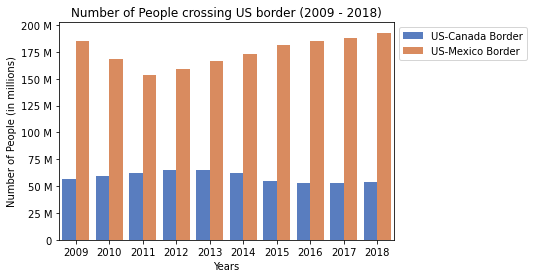

In [21]:
# Create a chart to compare number of people crossing US border between Canada and Mexico

# Get the data to plot the chart
Fig1 = sns.barplot(data=people_data, x="Year", y="Value", hue="Border")

# Format y-axis values to display in a reasonable format
Fig1.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig1.bar_label(Fig1.containers[0])

# Set chart title and axis labels
Fig1.set_xlabel("Years")
Fig1.set_ylabel("Number of People (in millions)")
Fig1.set_title("Number of People crossing US border (2009 - 2018)")

# Set legend details
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save the figure
plt.savefig("Images/Fig1.png")

# Show the chart
plt.show()

In [22]:
# Groupby data for the columns needed for the chart
vehicle_data = vehicles_df.groupby(["Year", "Border"]).sum().reset_index()

# Display the data
vehicle_data

,Year,Border,Value
0,2009,US-Canada Border,38375710
1,2009,US-Mexico Border,79685190
2,2010,US-Canada Border,41584265
3,2010,US-Mexico Border,74429402
4,2011,US-Canada Border,44365457
5,2011,US-Mexico Border,71834239
6,2012,US-Canada Border,46366548
7,2012,US-Mexico Border,73938483
8,2013,US-Canada Border,46800063
9,2013,US-Mexico Border,77831186


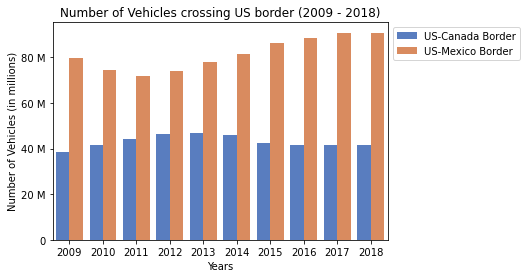

In [23]:
# Create a chart to compare number of vehicles crossing US border between Canada and Mexico

# Get the data to plot the chart
Fig2 = sns.barplot(data=vehicle_data, x="Year", y="Value", hue="Border")

# Format y-axis values to display in a reasonable format
Fig2.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig2.bar_label(Fig2.containers[0])

# Set chart title and axis labels
Fig2.set_xlabel("Years")
Fig2.set_ylabel("Number of Vehicles (in millions)")
Fig2.set_title("Number of Vehicles crossing US border (2009 - 2018)")

# Set legend details
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save the figure
plt.savefig("Images/Fig2.png")

# Show the chart
plt.show()

## Question 2:  Which are the top 5 busiest ports between US and Canada? & Which are the top 5 busiest ports between US and Mexico?

### Busiest border in terms of People traffic

In [24]:
# Calculate the average number of people prossing each port over 10 years

# Groupby 'Years' and 'Port Name' data
people_data_average = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()

# Groupby 'Port Name' again and take average of 'Values' by dividing by number of years in the data
people_data_average = people_data_average.groupby(["Port Name", "Border"])["Value"].sum()/len(people_data_average["Year"].unique())

# Convert to dataframe, sort values and reset index
people_data_average = pd.DataFrame(people_data_average).sort_values("Value", ascending=False).reset_index()

# Display the data
people_data_average.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,30956733.7
1,El Paso,US-Mexico Border,25945313.1
2,Laredo,US-Mexico Border,14764553.0
3,Otay Mesa,US-Mexico Border,13916334.0
4,Buffalo-Niagara Falls,US-Canada Border,12494713.9


### Busiest border in terms of People traffic between US and Canada

In [25]:
# Filter the data for people traffic to retrieve only US-Canada border details
people_canada_df = people_data_average.loc[people_data_average["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
people_canada_df.head()

,Port Name,Border,Value
0,Buffalo-Niagara Falls,US-Canada Border,12494713.9
1,Blaine,US-Canada Border,8537955.4
2,Detroit,US-Canada Border,7300574.8
3,Port Huron,US-Canada Border,3549121.6
4,Champlain-Rouses Point,US-Canada Border,2768509.2


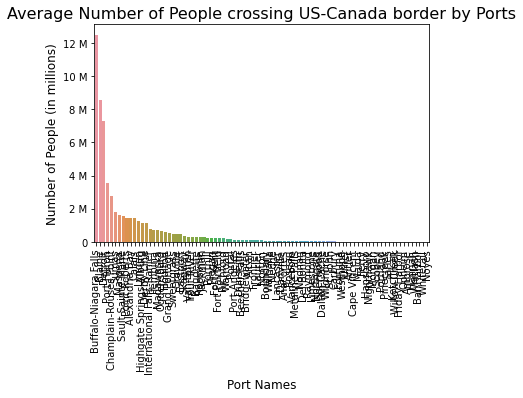

In [26]:
# Create a chart to compare average people traffic on US-Canada border between different ports

# Get the data to plot the chart
Fig3 = sns.barplot(data=people_canada_df, x="Port Name", y="Value")

# Format y-axis values to display in a reasonable format
Fig3.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig3.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig3.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig3.set_title("Average Number of People crossing US-Canada border by Ports", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig3.png")

# Show the chart
plt.show()

In [27]:
# Get the data for top 5 Ports between US-Canada border based on people traffic
top5_ports_canada_people = people_canada_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_canada_people = top5_ports_canada_people["Port Name"]

# Retrieve and filter data for people traffic for US-Canda border only
people_canada_data = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
people_canada_data = people_canada_data.loc[people_canada_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top5_ports_canada_people_data = []

# Loop through filtered data for top5 Ports:
for index, row in people_canada_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_canada_people:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_canada_people_data.append(row)

# Convert the list to dataste
top5_ports_canada_people_data = pd.DataFrame(top5_ports_canada_people_data).reset_index(drop=True)

# Display the data
top5_ports_canada_people_data

,Year,Border,Port Name,Value
0,2009,US-Canada Border,Blaine,6334460
1,2009,US-Canada Border,Buffalo-Niagara Falls,12974149
2,2009,US-Canada Border,Champlain-Rouses Point,2519258
3,2009,US-Canada Border,Detroit,7587617
4,2009,US-Canada Border,Port Huron,3394708
5,2010,US-Canada Border,Blaine,7389462
6,2010,US-Canada Border,Buffalo-Niagara Falls,12952831
7,2010,US-Canada Border,Champlain-Rouses Point,2652204
8,2010,US-Canada Border,Detroit,7506393
9,2010,US-Canada Border,Port Huron,3505976


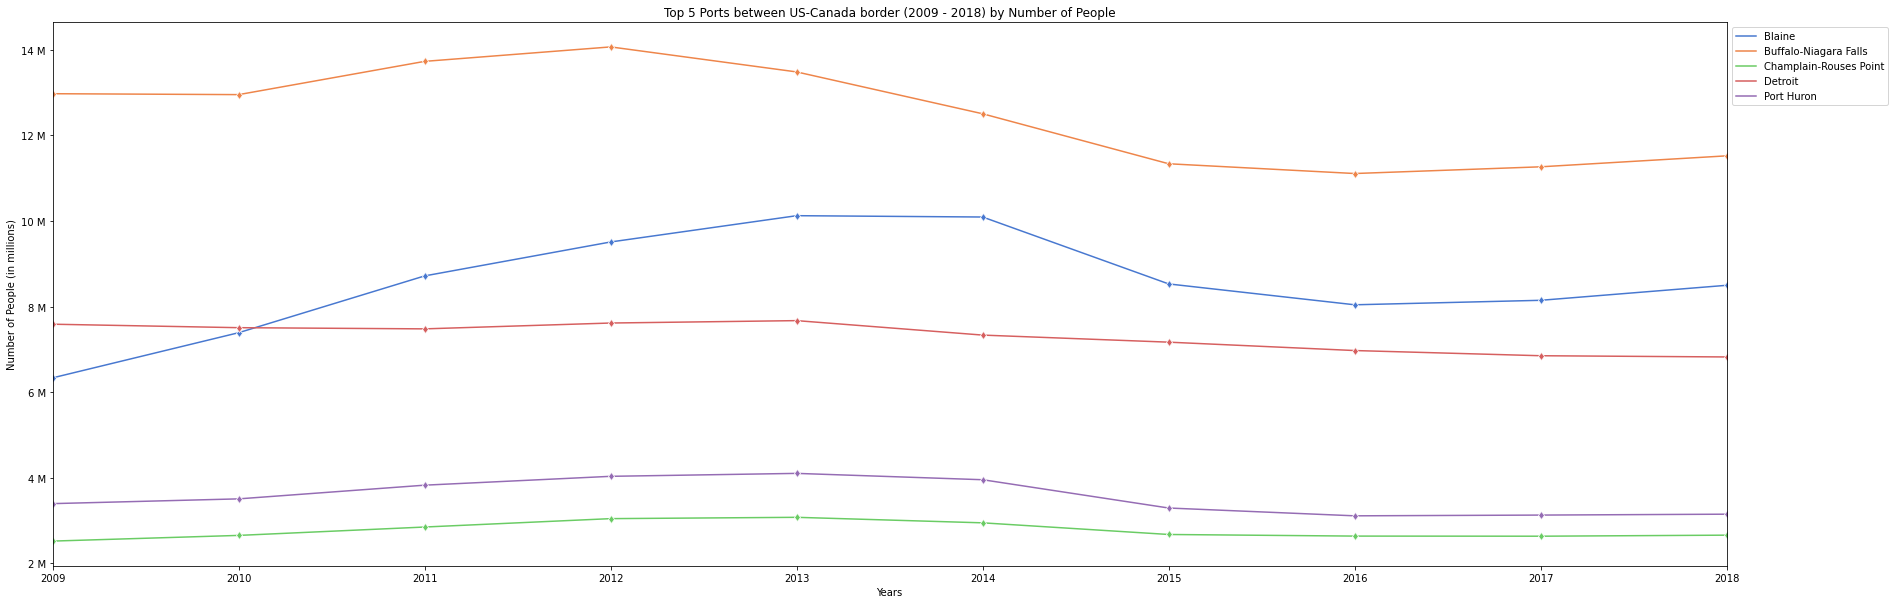

In [28]:
# Create a chart to see people traffic on top 5 ports between US and Canada over 10 years

# Get the data to plot the chart
Fig4 = sns.lineplot(data=top5_ports_canada_people_data, x="Year", y="Value", hue="Port Name", marker='d')

# x_labels = top5_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig4.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig4.set_xlabel("Years")
Fig4.set_ylabel("Number of People (in millions)")
Fig4.set_title("Top 5 Ports between US-Canada border (2009 - 2018) by Number of People")

# Set parametes and xticks
Fig4.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig4.png")

# Show the chart
plt.show()

### Busiest border in terms of People traffic between US and Mexico

In [29]:
# Filter the data for people traffic to retrieve only US-Mexico border details
people_mexico_df = people_data_average.loc[people_data_average["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
people_mexico_df.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,30956733.7
1,El Paso,US-Mexico Border,25945313.1
2,Laredo,US-Mexico Border,14764553.0
3,Otay Mesa,US-Mexico Border,13916334.0
4,Hidalgo,US-Mexico Border,12253841.9


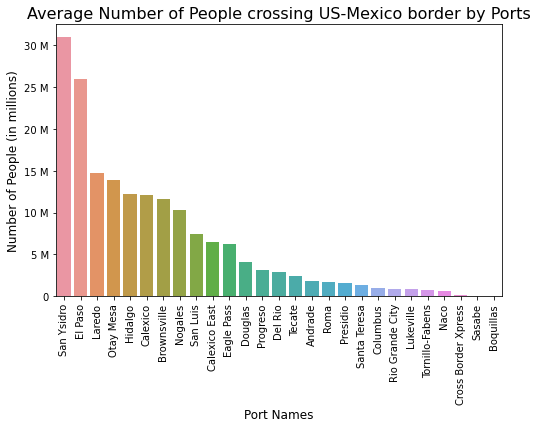

In [30]:
# Create a chart to compare average people traffic on US-Mexico border between different ports

# Get the data to plot the chart
Fig5 = sns.barplot(data=people_mexico_df, x="Port Name", y="Value")

# Format y-axis values to display in a reasonable format
Fig5.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig5.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig5.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig5.set_title("Average Number of People crossing US-Mexico border by Ports", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig5.png")

# Show the chart
plt.show()

In [31]:
# Get the data for top 5 Ports between US-Mexico border based on people traffic
top5_ports_mexico_people = people_mexico_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_mexico_people = top5_ports_mexico_people["Port Name"]

# Retrieve and filter data for people traffic for US-Mexico border only
people_mexico_data = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
people_mexico_data = people_mexico_data.loc[people_mexico_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top5_ports_mexico_people_data = []

# Loop through filtered data for top5 Ports:
for index, row in people_mexico_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_mexico_people:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_mexico_people_data.append(row)

# Convert the list to dataste
top5_ports_mexico_people_data = pd.DataFrame(top5_ports_mexico_people_data).reset_index(drop=True)

# Display the data
top5_ports_mexico_people_data

,Year,Border,Port Name,Value
0,2009,US-Mexico Border,El Paso,26326668
1,2009,US-Mexico Border,Hidalgo,14631706
2,2009,US-Mexico Border,Laredo,17665030
3,2009,US-Mexico Border,Otay Mesa,10213341
4,2009,US-Mexico Border,San Ysidro,30576138
5,2010,US-Mexico Border,El Paso,25250482
6,2010,US-Mexico Border,Hidalgo,13248253
7,2010,US-Mexico Border,Laredo,15347298
8,2010,US-Mexico Border,Otay Mesa,9450171
9,2010,US-Mexico Border,San Ysidro,30590858


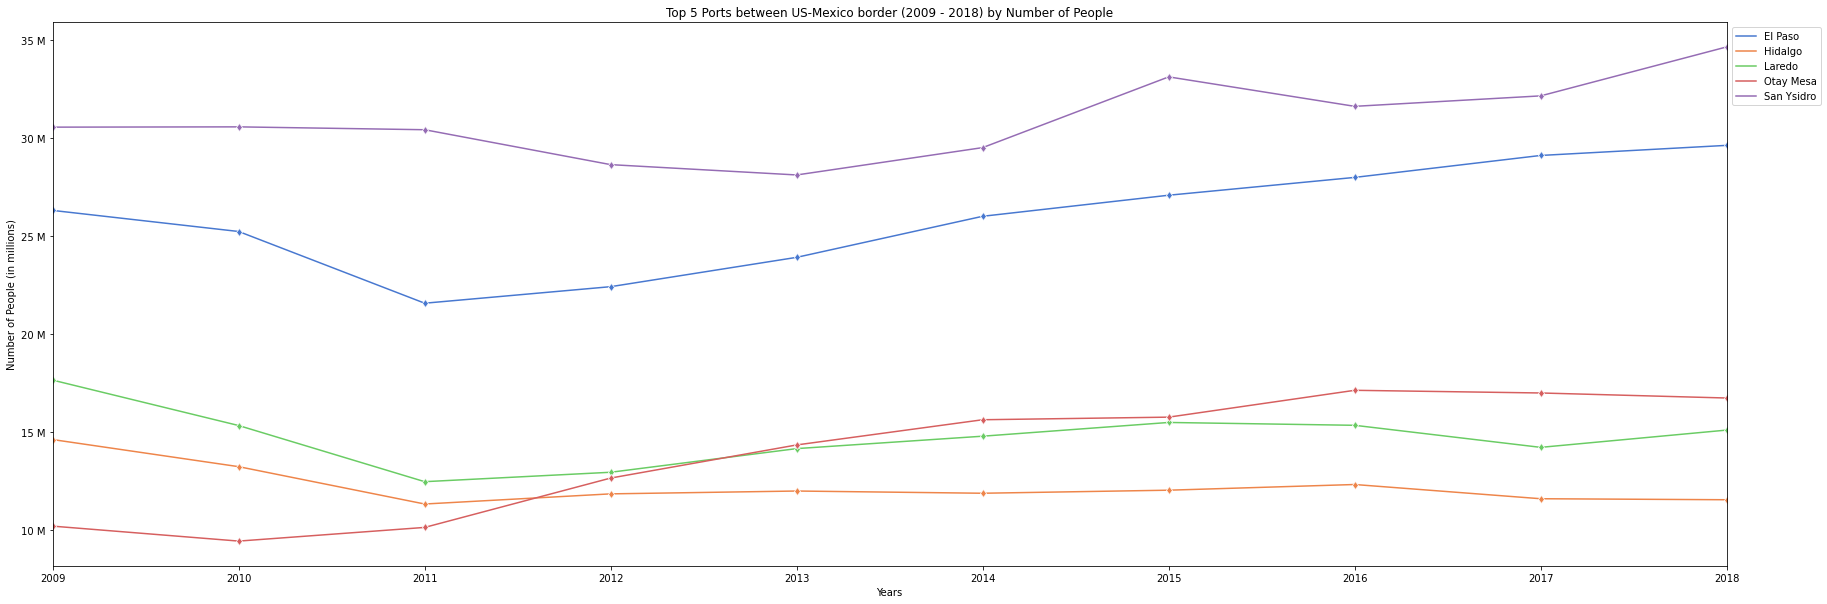

In [32]:
# Create a chart to see people traffic on top 5 ports between US and Mexico over 10 years

# Get the data to plot the chart
Fig6 = sns.lineplot(data=top5_ports_mexico_people_data, x="Year", y="Value", hue="Port Name", marker='d')

# x_labels = top5_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig6.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig6.set_xlabel("Years")
Fig6.set_ylabel("Number of People (in millions)")
Fig6.set_title("Top 5 Ports between US-Mexico border (2009 - 2018) by Number of People")

# Set parametes and xticks
Fig6.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig6.png")

# Show the chart
plt.show()

### Busiest border in terms of Vehicle traffic

In [33]:
# Calculate the average number of vehicles prossing each port over 10 years

# Groupby 'Years' and 'Port Name' data
vehicle_data_average = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()

# Groupby 'Port Name' again and take average of 'Values' by dividing by number of years in the data
vehicle_data_average = vehicle_data_average.groupby(["Port Name", "Border"])["Value"].sum()/len(vehicle_data_average["Year"].unique())

# Convert to dataframe, sort values and reset index
vehicle_data_average = pd.DataFrame(vehicle_data_average).sort_values("Value", ascending=False).reset_index()

# Display the data
vehicle_data_average.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,13081456.8
1,El Paso,US-Mexico Border,12715631.1
2,Laredo,US-Mexico Border,9206475.4
3,Otay Mesa,US-Mexico Border,7807289.6
4,Buffalo-Niagara Falls,US-Canada Border,7333610.7


### Busiest border in terms of Vehicle traffic between US and Canada

In [34]:
# Filter the data for vehicle traffic to retrieve only US-Canada border details
vehicle_canada_df = vehicle_data_average.loc[vehicle_data_average["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
vehicle_canada_df.head()

,Port Name,Border,Value
0,Buffalo-Niagara Falls,US-Canada Border,7333610.7
1,Detroit,US-Canada Border,7296560.3
2,Blaine,US-Canada Border,4983645.3
3,Port Huron,US-Canada Border,3641960.9
4,Champlain-Rouses Point,US-Canada Border,1727803.3


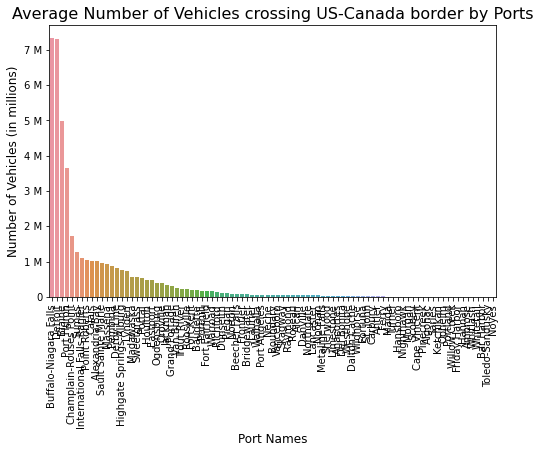

In [35]:
# Create a chart to compare average vehicle traffic on US-Canada border between different ports

# Get the data to plot the chart
Fig7 = sns.barplot(data=vehicle_canada_df, x="Port Name", y="Value")

# Format y-axis values to display in a reasonable format
Fig7.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig7.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig7.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig7.set_title("Average Number of Vehicles crossing US-Canada border by Ports", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig7.png")

# Show the chart
plt.show()

In [36]:
# Get the data for top 5 Ports between US-Canada border based on vehicle traffic
top5_ports_canada_vehicle = vehicle_canada_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_canada_vehicle = top5_ports_canada_vehicle["Port Name"]

# Retrieve and filter data for people traffic for US-Canda border only
vehicle_canada_data = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
vehicle_canada_data = vehicle_canada_data.loc[vehicle_canada_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top5_ports_canada_vehicle_data = []

# Loop through filtered data for top5 Ports:
for index, row in vehicle_canada_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_canada_vehicle:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_canada_vehicle_data.append(row)

# Convert the list to dataste
top5_ports_canada_vehicle_data = pd.DataFrame(top5_ports_canada_vehicle_data).reset_index(drop=True)

# Display the data
top5_ports_canada_vehicle_data

,Year,Border,Port Name,Value
0,2009,US-Canada Border,Blaine,3568534
1,2009,US-Canada Border,Buffalo-Niagara Falls,7114961
2,2009,US-Canada Border,Champlain-Rouses Point,1688245
3,2009,US-Canada Border,Detroit,6621018
4,2009,US-Canada Border,Port Huron,3194401
5,2010,US-Canada Border,Blaine,4117389
6,2010,US-Canada Border,Buffalo-Niagara Falls,7417921
7,2010,US-Canada Border,Champlain-Rouses Point,1678400
8,2010,US-Canada Border,Detroit,7108426
9,2010,US-Canada Border,Port Huron,3377313


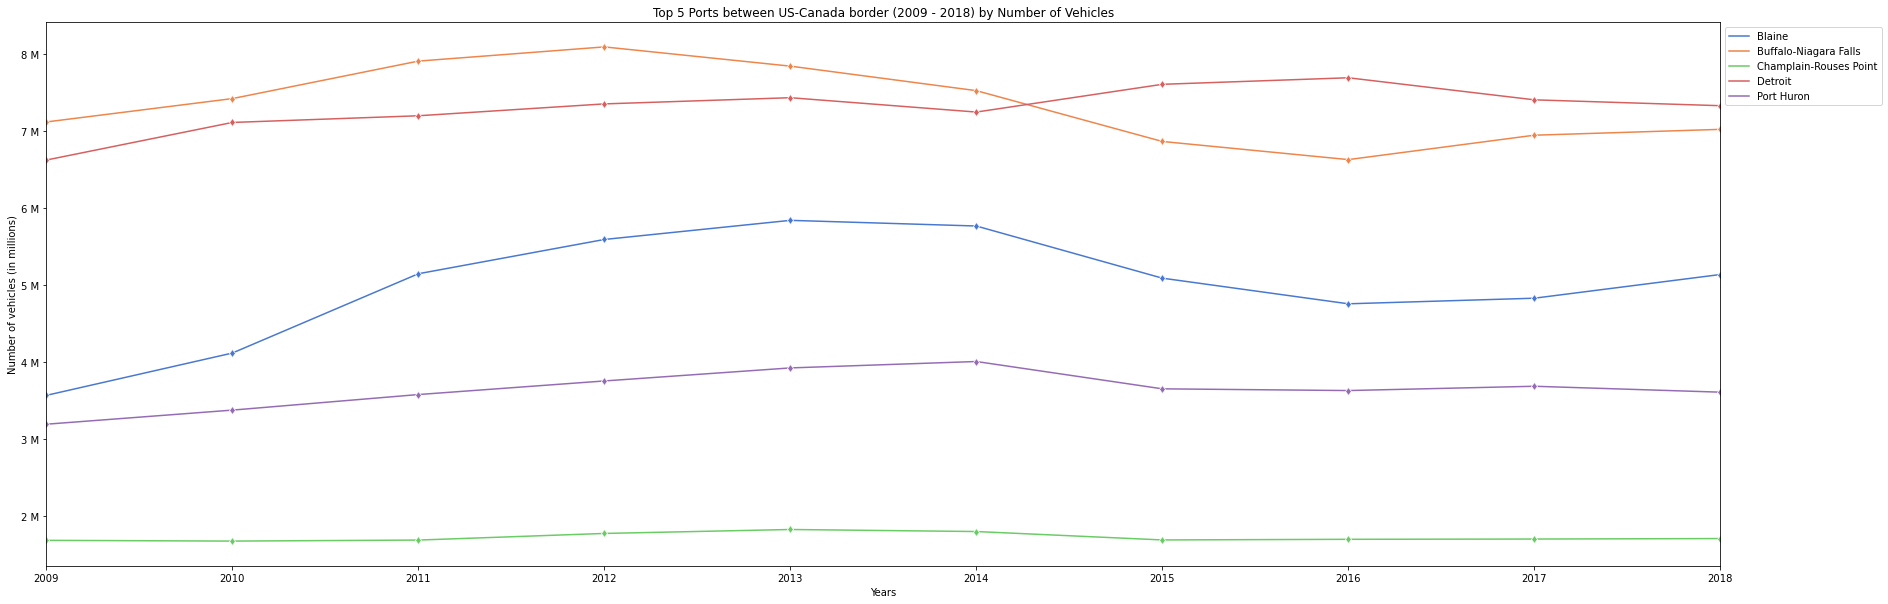

In [37]:
# Create a chart to see vehicle traffic on top 5 ports between US and Canada over 10 years

# Get the data to plot the chart
Fig8 = sns.lineplot(data=top5_ports_canada_vehicle_data, x="Year", y="Value", hue="Port Name", marker='d')

# x_labels = top5_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig8.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig8.set_xlabel("Years")
Fig8.set_ylabel("Number of vehicles (in millions)")
Fig8.set_title("Top 5 Ports between US-Canada border (2009 - 2018) by Number of Vehicles")

# Set parametes and xticks
Fig8.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig8.png")

# Show the chart
plt.show()

### Busiest border in terms of Vehicle traffic between US and Mexico

In [38]:
# Filter the data for vehicle traffic to retrieve only US-Mexico border details
vehicle_mexico_df = vehicle_data_average.loc[vehicle_data_average["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
vehicle_mexico_df.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,13081456.8
1,El Paso,US-Mexico Border,12715631.1
2,Laredo,US-Mexico Border,9206475.4
3,Otay Mesa,US-Mexico Border,7807289.6
4,Hidalgo,US-Mexico Border,5977097.9


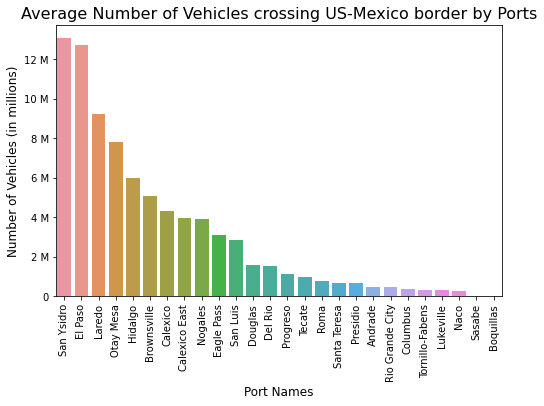

In [39]:
# Create a chart to compare average vehicle traffic on US-Mexico border between different ports

# Get the data to plot the chart
Fig9 = sns.barplot(data=vehicle_mexico_df, x="Port Name", y="Value")

# Format y-axis values to display in a reasonable format
Fig9.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig9.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig9.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig9.set_title("Average Number of Vehicles crossing US-Mexico border by Ports", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig9.png")

# Show the chart
plt.show()

In [40]:
# Get the data for top 5 Ports between US-Mexico border based on vehicle traffic
top5_ports_mexico_vehicle = vehicle_mexico_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_mexico_vehicle = top5_ports_mexico_vehicle["Port Name"]

# Retrieve and filter data for people traffic for US-Mexico border only
vehicle_mexico_data = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
vehicle_mexico_data = vehicle_mexico_data.loc[vehicle_mexico_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top5_ports_mexico_vehicle_data = []

# Loop through filtered data for top5 Ports:
for index, row in vehicle_mexico_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_mexico_vehicle:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_mexico_vehicle_data.append(row)

# Convert the list to dataste
top5_ports_mexico_vehicle_data = pd.DataFrame(top5_ports_mexico_vehicle_data).reset_index(drop=True)

# Display the data
top5_ports_mexico_vehicle_data

,Year,Border,Port Name,Value
0,2009,US-Mexico Border,El Paso,11906982
1,2009,US-Mexico Border,Hidalgo,7046317
2,2009,US-Mexico Border,Laredo,8534038
3,2009,US-Mexico Border,Otay Mesa,5516018
4,2009,US-Mexico Border,San Ysidro,13427337
5,2010,US-Mexico Border,El Paso,11481333
6,2010,US-Mexico Border,Hidalgo,6543184
7,2010,US-Mexico Border,Laredo,8397421
8,2010,US-Mexico Border,Otay Mesa,5433832
9,2010,US-Mexico Border,San Ysidro,13418912


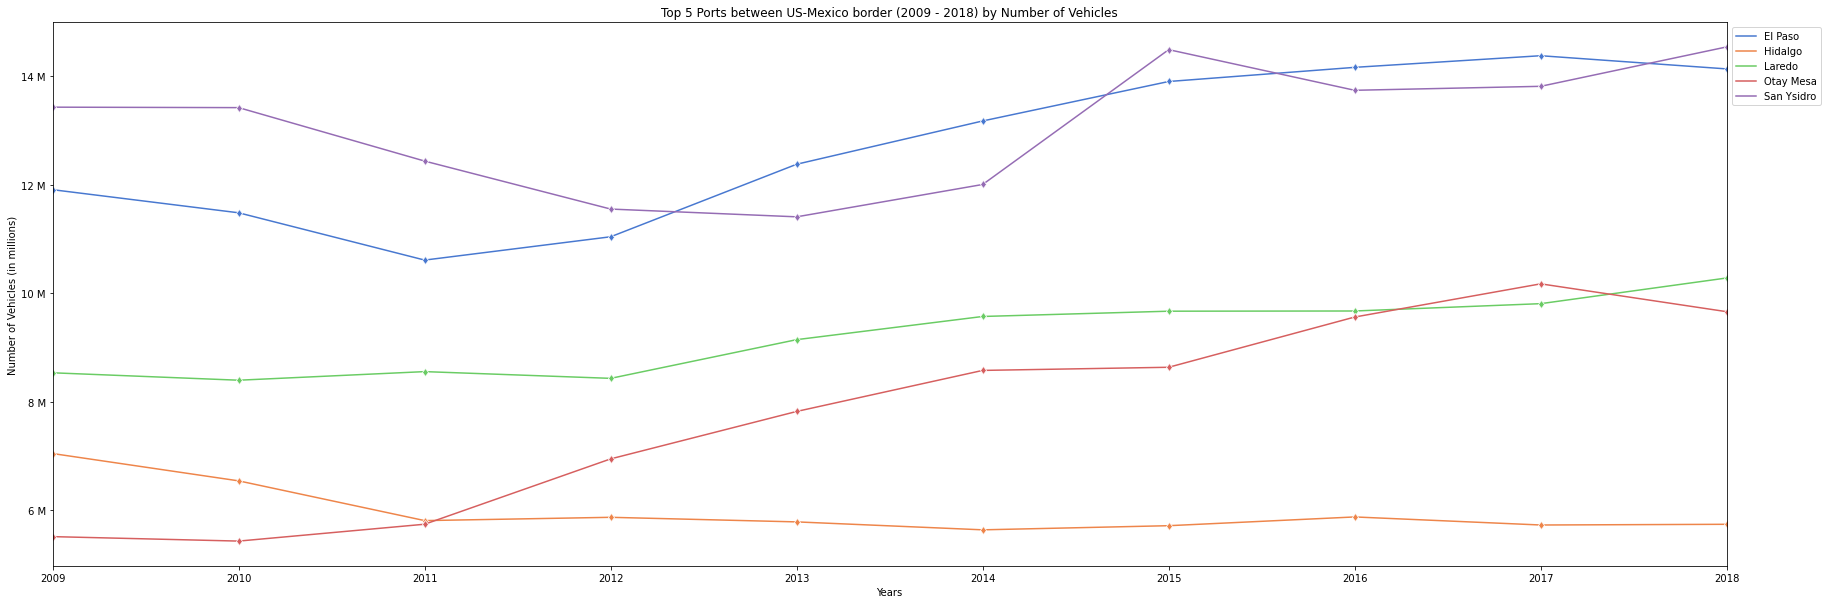

In [41]:
# Create a chart to see vehicle traffic on top 5 ports between US and Mexico over 10 years

# Get the data to plot the chart
Fig10 = sns.lineplot(data=top5_ports_mexico_vehicle_data, x="Year", y="Value", hue="Port Name", marker='d')

# x_labels = top5_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig10.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig10.set_xlabel("Years")
Fig10.set_ylabel("Number of Vehicles (in millions)")
Fig10.set_title("Top 5 Ports between US-Mexico border (2009 - 2018) by Number of Vehicles")

# Set parametes and xticks
Fig10.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig10.png")

# Show the chart
plt.show()

## Question 3: What are the top 3 busiest states between US and Canada? & What are the top 3 busiest states between US and Mexico?

Busiest State in terms of People Traffic

In [42]:
# Calculate the average number of people crossing each state over 10 years

# Groupby 'Years' and 'State' data
people_data_average_state = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()

# Groupby 'State' again and take average of 'Values' by dividing by number of years in the data
people_data_average_state = people_data_average_state.groupby(["State", "Border"])["Value"].sum()/len(people_data_average_state["Year"].unique())

# Convert to dataframe, sort values and reset index
people_data_average_state = pd.DataFrame(people_data_average_state).sort_values("Value", ascending=False).reset_index()

# Display the data
people_data_average_state.head()

,State,Border,Value
0,Texas,US-Mexico Border,81813523.1
1,California,US-Mexico Border,67762197.8
2,Arizona,US-Mexico Border,23418581.4
3,New York,US-Canada Border,19286848.7
4,Washington,US-Canada Border,14186034.7


Busiest State in terms of People Traffic between US and Canada

In [43]:
# Filter the data for people traffic to retrieve only US-Canada border details
people_canada_state_df = people_data_average_state.loc[people_data_average_state["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
people_canada_state_df.head()

,State,Border,Value
0,New York,US-Canada Border,19286848.7
1,Washington,US-Canada Border,14186034.7
2,Michigan,US-Canada Border,12415064.7
3,Maine,US-Canada Border,4279652.2
4,Vermont,US-Canada Border,2720030.8


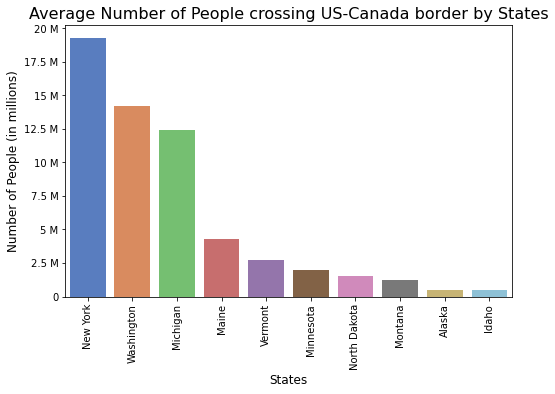

In [44]:
# Create a chart to compare average people traffic on US-Canada border between different states

# Get the data to plot the chart
Fig11 = sns.barplot(data=people_canada_state_df, x="State", y="Value")

# Format y-axis values to display in a reasonable format
Fig11.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig11.set_xlabel("States", fontdict={'fontsize':12})
Fig11.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig11.set_title("Average Number of People crossing US-Canada border by States", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig11.png")

# Show the chart
plt.show()

In [45]:
# Get the data for top 3 States between US-Canada border based on people traffic
top3_states_canada_people = people_canada_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 State Names in a list
top3_statenames_canada_people = top3_states_canada_people["State"]

# Retrieve and filter data for people traffic for US-Canda border only
people_canada_state_data = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
people_canada_state_data = people_canada_state_data.loc[people_canada_state_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top3_states_canada_people_data = []

# Loop through filtered data for top 3 States:
for index, row in people_canada_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_canada_people:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_canada_people_data.append(row)

# Convert the list to dataste
top3_states_canada_people_data = pd.DataFrame(top3_states_canada_people_data).reset_index(drop=True)

# Display the data
top3_states_canada_people_data

,Year,Border,State,Value
0,2009,US-Canada Border,Michigan,12453911
1,2009,US-Canada Border,New York,19620922
2,2009,US-Canada Border,Washington,11561223
3,2010,US-Canada Border,Michigan,12644883
4,2010,US-Canada Border,New York,19759078
5,2010,US-Canada Border,Washington,13311900
6,2011,US-Canada Border,Michigan,13106892
7,2011,US-Canada Border,New York,20803752
8,2011,US-Canada Border,Washington,14732098
9,2012,US-Canada Border,Michigan,13524726


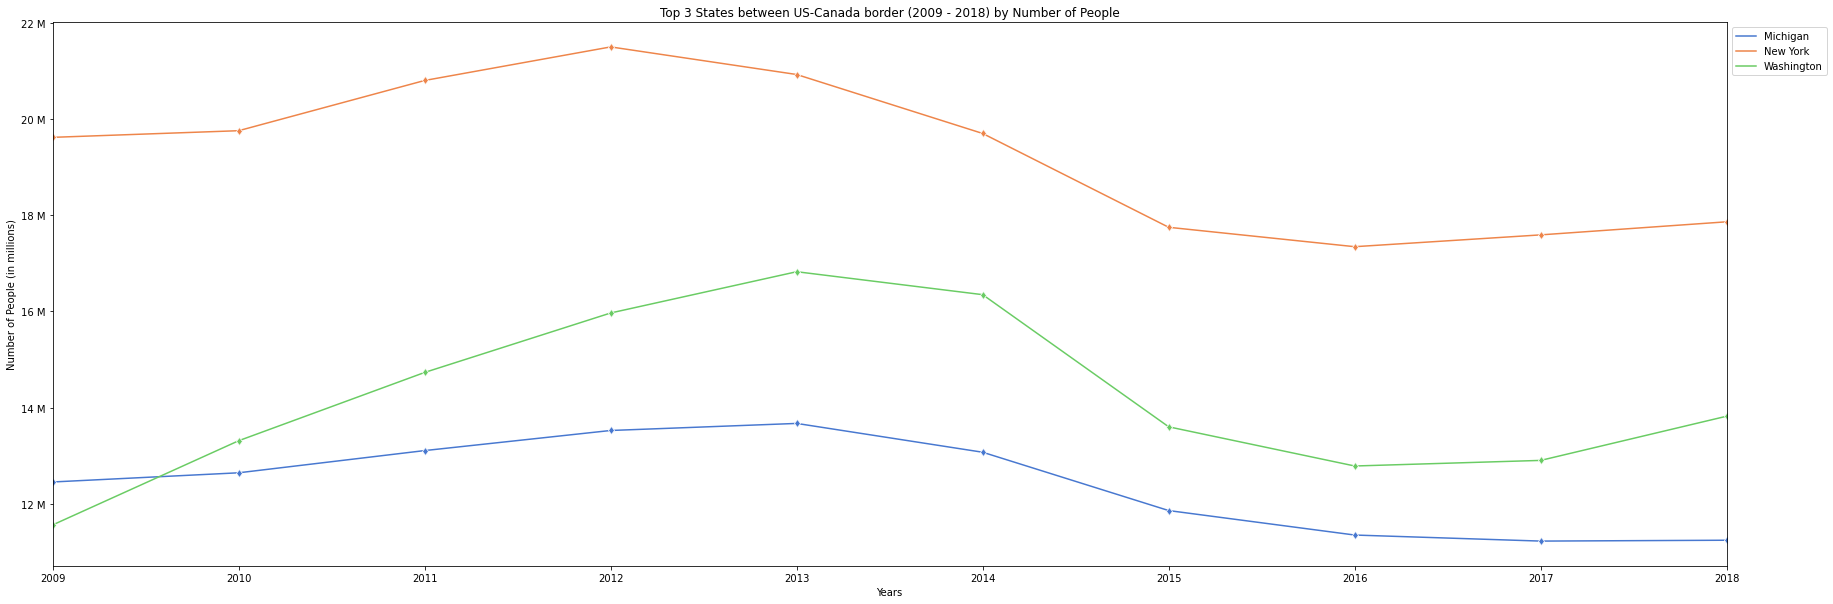

In [46]:
# Create a chart to see people traffic on top 3 states between US and Canada over 10 years

# Get the data to plot the chart
Fig12 = sns.lineplot(data=top3_states_canada_people_data, x="Year", y="Value", hue="State", marker='d')

# x_labels = top3_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig12.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig12.set_xlabel("Years")
Fig12.set_ylabel("Number of People (in millions)")
Fig12.set_title("Top 3 States between US-Canada border (2009 - 2018) by Number of People")

# Set parametes and xticks
Fig12.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig12.set_xticks(range(10))
# Fig12.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig12.png")

# Show the chart
plt.show()

Busiest state in terms of People traffic between US and Mexico

In [47]:
# Filter the data for people traffic to retrieve only US-Mexico border details
people_mexico_state_df = people_data_average_state.loc[people_data_average_state["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
people_mexico_state_df.head()

,State,Border,Value
0,Texas,US-Mexico Border,81813523.1
1,California,US-Mexico Border,67762197.8
2,Arizona,US-Mexico Border,23418581.4
3,New Mexico,US-Mexico Border,2266536.2


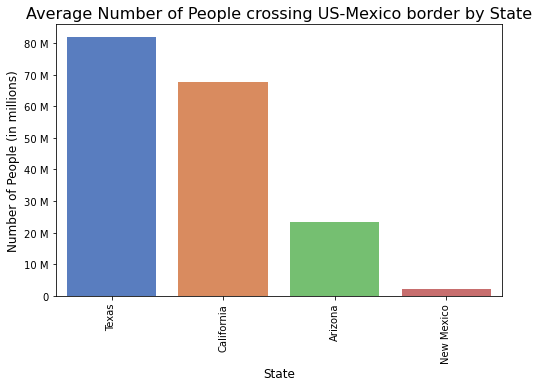

In [48]:
# Create a chart to compare average people traffic on US-Mexico border between different states

# Get the data to plot the chart
Fig13 = sns.barplot(data=people_mexico_state_df, x="State", y="Value")

# Format y-axis values to display in a reasonable format
Fig13.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig13.set_xlabel("State", fontdict={'fontsize':12})
Fig13.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig13.set_title("Average Number of People crossing US-Mexico border by State", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig13.png")

# Show the chart
plt.show()

In [49]:
# Get the data for top 3 States between US-Mexico border based on people traffic
top3_states_mexico_people = people_mexico_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_mexico_people = top3_states_mexico_people["State"]

# Retrieve and filter data for people traffic for US-Mexico border only
people_mexico_state_data = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
people_mexico_state_data = people_mexico_state_data.loc[people_mexico_state_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top3_states_mexico_people_data = []

# Loop through filtered data for top 3 States:
for index, row in people_mexico_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_mexico_people:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_mexico_people_data.append(row)

# Convert the list to dataste
top3_states_mexico_people_data = pd.DataFrame(top3_states_mexico_people_data).reset_index(drop=True)

# Display the data
top3_states_mexico_people_data

,Year,Border,State,Value
0,2009,US-Mexico Border,Arizona,25842603
1,2009,US-Mexico Border,California,63682359
2,2009,US-Mexico Border,Texas,92676707
3,2010,US-Mexico Border,Arizona,22561842
4,2010,US-Mexico Border,California,61106359
5,2010,US-Mexico Border,Texas,82225341
6,2011,US-Mexico Border,Arizona,20500606
7,2011,US-Mexico Border,California,61154747
8,2011,US-Mexico Border,Texas,70242948
9,2012,US-Mexico Border,Arizona,21248852


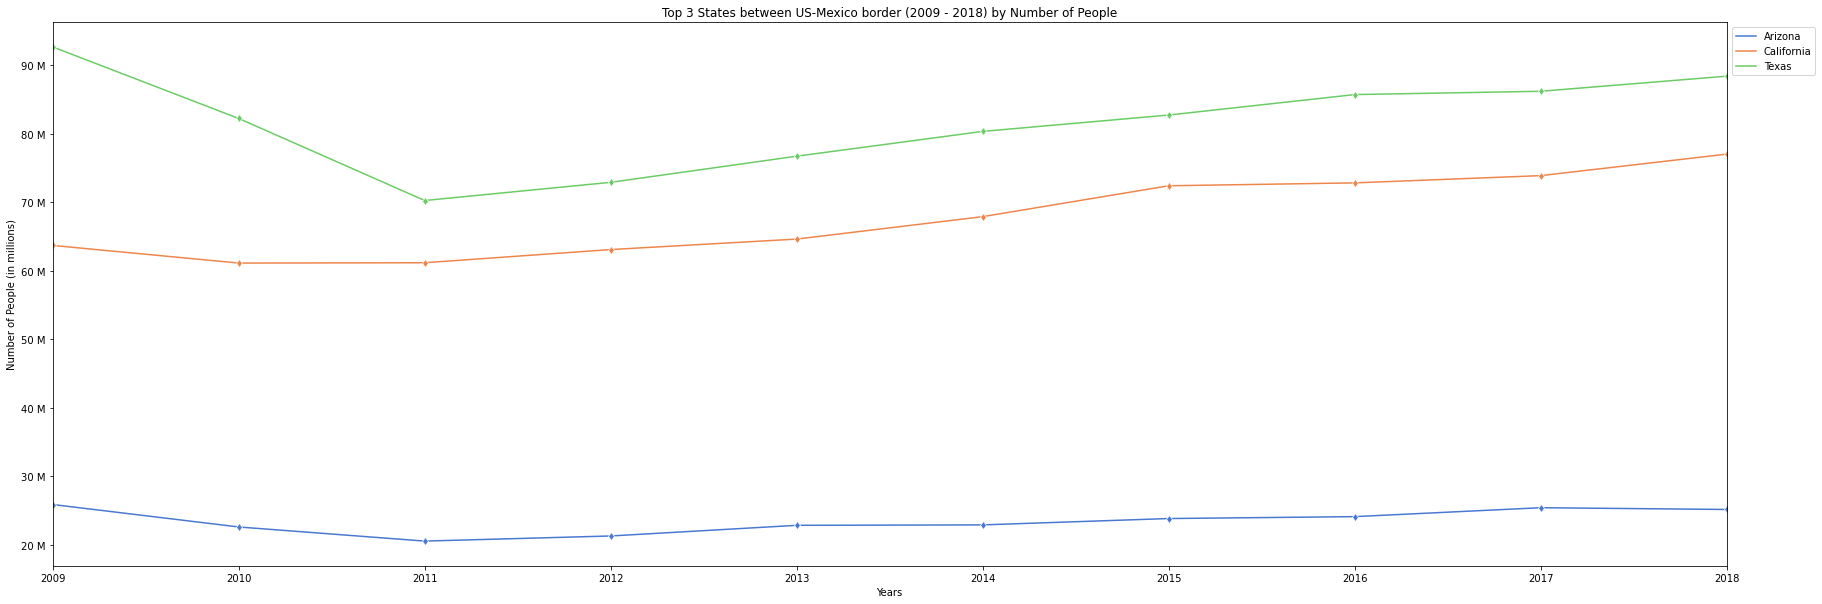

In [50]:
# Create a chart to see people traffic on top 3 states between US and Mexico over 10 years

# Get the data to plot the chart
Fig14 = sns.lineplot(data=top3_states_mexico_people_data, x="Year", y="Value", hue="State", marker='d')

# x_labels = top5_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig14.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig14.set_xlabel("Years")
Fig14.set_ylabel("Number of People (in millions)")
Fig14.set_title("Top 3 States between US-Mexico border (2009 - 2018) by Number of People")

# Set parametes and xticks
Fig14.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig14.png")

# Show the chart
plt.show()

Busiest border in terms of Vehicle traffic by State

In [51]:
# Calculate the average number of vehicles prossing each state over 10 years

# Groupby 'Years' and 'State' data
vehicle_data_average_state = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()

# Groupby 'State' again and take average of 'Values' by dividing by number of years in the data
vehicle_data_average_state = vehicle_data_average_state.groupby(["State", "Border"])["Value"].sum()/len(vehicle_data_average_state["Year"].unique())

# Convert to dataframe, sort values and reset index
vehicle_data_average_state = pd.DataFrame(vehicle_data_average_state).sort_values("Value", ascending=False).reset_index()

# Display the data
vehicle_data_average_state.head()

,State,Border,Value
0,Texas,US-Mexico Border,40914053.3
1,California,US-Mexico Border,30600747.5
2,Michigan,US-Canada Border,11907137.7
3,New York,US-Canada Border,11641221.8
4,Arizona,US-Mexico Border,8992310.4


Busiest border in terms of Vehicle traffic between US and Canada by State

In [52]:
# Filter the data for vehicle traffic to retrieve only US-Canada border details
vehicle_canada_state_df = vehicle_data_average_state.loc[vehicle_data_average_state["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
vehicle_canada_state_df.head()

,State,Border,Value
0,Michigan,US-Canada Border,11907137.7
1,New York,US-Canada Border,11641221.8
2,Washington,US-Canada Border,8815881.1
3,Maine,US-Canada Border,3353929.0
4,Vermont,US-Canada Border,1909397.0


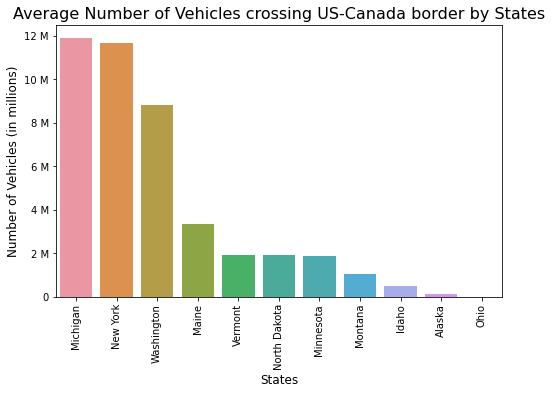

In [53]:
# Create a chart to compare average vehicle traffic on US-Canada border between different states

# Get the data to plot the chart
Fig15 = sns.barplot(data=vehicle_canada_state_df, x="State", y="Value")

# Format y-axis values to display in a reasonable format
Fig15.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig15.set_xlabel("States", fontdict={'fontsize':12})
Fig15.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig15.set_title("Average Number of Vehicles crossing US-Canada border by States", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig15.png")

# Show the chart
plt.show()

In [54]:
# Get the data for top 3 States between US-Canada border based on vehicle traffic
top3_states_canada_vehicle = vehicle_canada_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_canada_vehicle = top3_states_canada_vehicle["State"]

# Retrieve and filter data for people traffic for US-Canda border only
vehicle_canada_state_data = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
vehicle_canada_state_data = vehicle_canada_state_data.loc[vehicle_canada_state_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top3_states_canada_vehicle_data = []

# Loop through filtered data for top 3 States:
for index, row in vehicle_canada_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_canada_vehicle:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_canada_vehicle_data.append(row)

# Convert the list to dataste
top3_states_canada_vehicle_data = pd.DataFrame(top3_states_canada_vehicle_data).reset_index(drop=True)

# Display the data
top3_states_canada_vehicle_data

,Year,Border,State,Value
0,2009,US-Canada Border,Michigan,10721378
1,2009,US-Canada Border,New York,11269622
2,2009,US-Canada Border,Washington,6661481
3,2010,US-Canada Border,Michigan,11471367
4,2010,US-Canada Border,New York,11727147
5,2010,US-Canada Border,Washington,7656215
6,2011,US-Canada Border,Michigan,11843057
7,2011,US-Canada Border,New York,12199307
8,2011,US-Canada Border,Washington,9167414
9,2012,US-Canada Border,Michigan,12213536


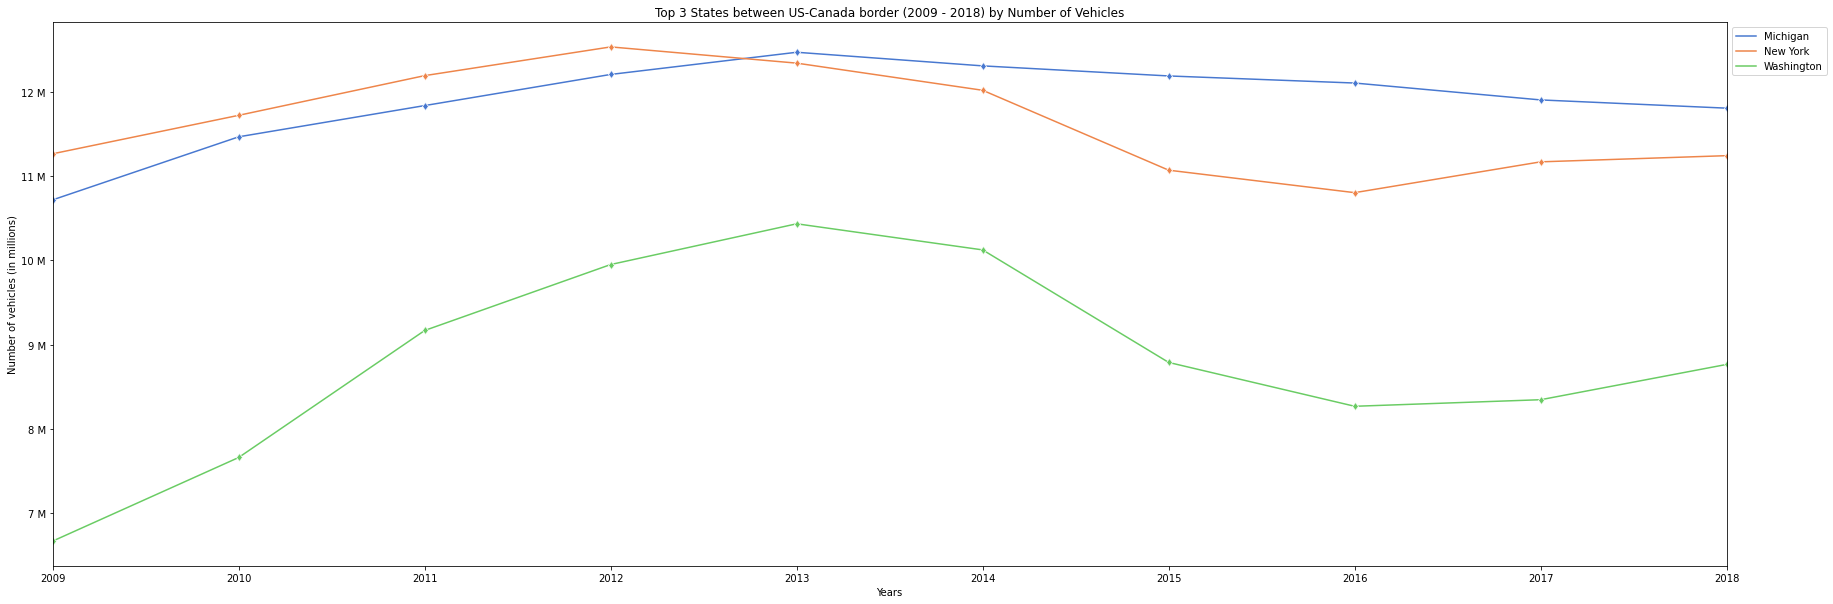

In [55]:
# Create a chart to see vehicle traffic on top 3 states between US and Canada over 10 years

# Get the data to plot the chart
Fig16 = sns.lineplot(data=top3_states_canada_vehicle_data, x="Year", y="Value", hue="State", marker='d')

# x_labels = top3_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig16.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig16.set_xlabel("Years")
Fig16.set_ylabel("Number of vehicles (in millions)")
Fig16.set_title("Top 3 States between US-Canada border (2009 - 2018) by Number of Vehicles")

# Set parametes and xticks
Fig16.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig16.set_xticks(range(10))
# Fig16.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig16.png")

# Show the chart
plt.show()

Busiest border in terms of Vehicle traffic between US and Mexico by state

In [56]:
# Filter the data for vehicle traffic to retrieve only US-Mexico border details
vehicle_mexico_state_df = vehicle_data_average_state.loc[vehicle_data_average_state["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
vehicle_mexico_state_df.head()

,State,Border,Value
0,Texas,US-Mexico Border,40914053.3
1,California,US-Mexico Border,30600747.5
2,Arizona,US-Mexico Border,8992310.4
3,New Mexico,US-Mexico Border,1045893.9


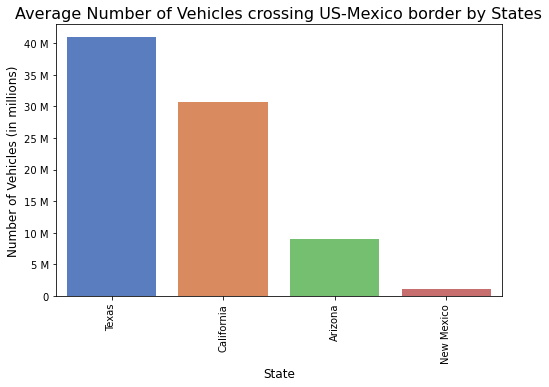

In [57]:
# Create a chart to compare average vehicle traffic on US-Mexico border between different states

# Get the data to plot the chart
Fig17 = sns.barplot(data=vehicle_mexico_state_df, x="State", y="Value")

# Format y-axis values to display in a reasonable format
Fig17.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig17.set_xlabel("State", fontdict={'fontsize':12})
Fig17.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig17.set_title("Average Number of Vehicles crossing US-Mexico border by States", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=30,10
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Images/Fig17.png")

# Show the chart
plt.show()

In [58]:
# Get the data for top 3 States between US-Mexico border based on vehicle traffic
top3_states_mexico_vehicle = vehicle_mexico_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_mexico_vehicle = top3_states_mexico_vehicle["State"]

# Retrieve and filter data for people traffic for US-Mexico border only
vehicle_mexico_state_data = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
vehicle_mexico_state_data = vehicle_mexico_state_data.loc[vehicle_mexico_state_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top3_states_mexico_vehicle_data = []

# Loop through filtered data for top 3 States:
for index, row in vehicle_mexico_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_mexico_vehicle:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_mexico_vehicle_data.append(row)

# Convert the list to dataste
top3_states_mexico_vehicle_data = pd.DataFrame(top3_states_mexico_vehicle_data).reset_index(drop=True)

# Display the data
top3_states_mexico_vehicle_data

,Year,Border,State,Value
0,2009,US-Mexico Border,Arizona,8136455
1,2009,US-Mexico Border,California,28703144
2,2009,US-Mexico Border,Texas,41915509
3,2010,US-Mexico Border,Arizona,7466238
4,2010,US-Mexico Border,California,27554641
5,2010,US-Mexico Border,Texas,38448969
6,2011,US-Mexico Border,Arizona,7501046
7,2011,US-Mexico Border,California,27009908
8,2011,US-Mexico Border,Texas,36455897
9,2012,US-Mexico Border,Arizona,8302033


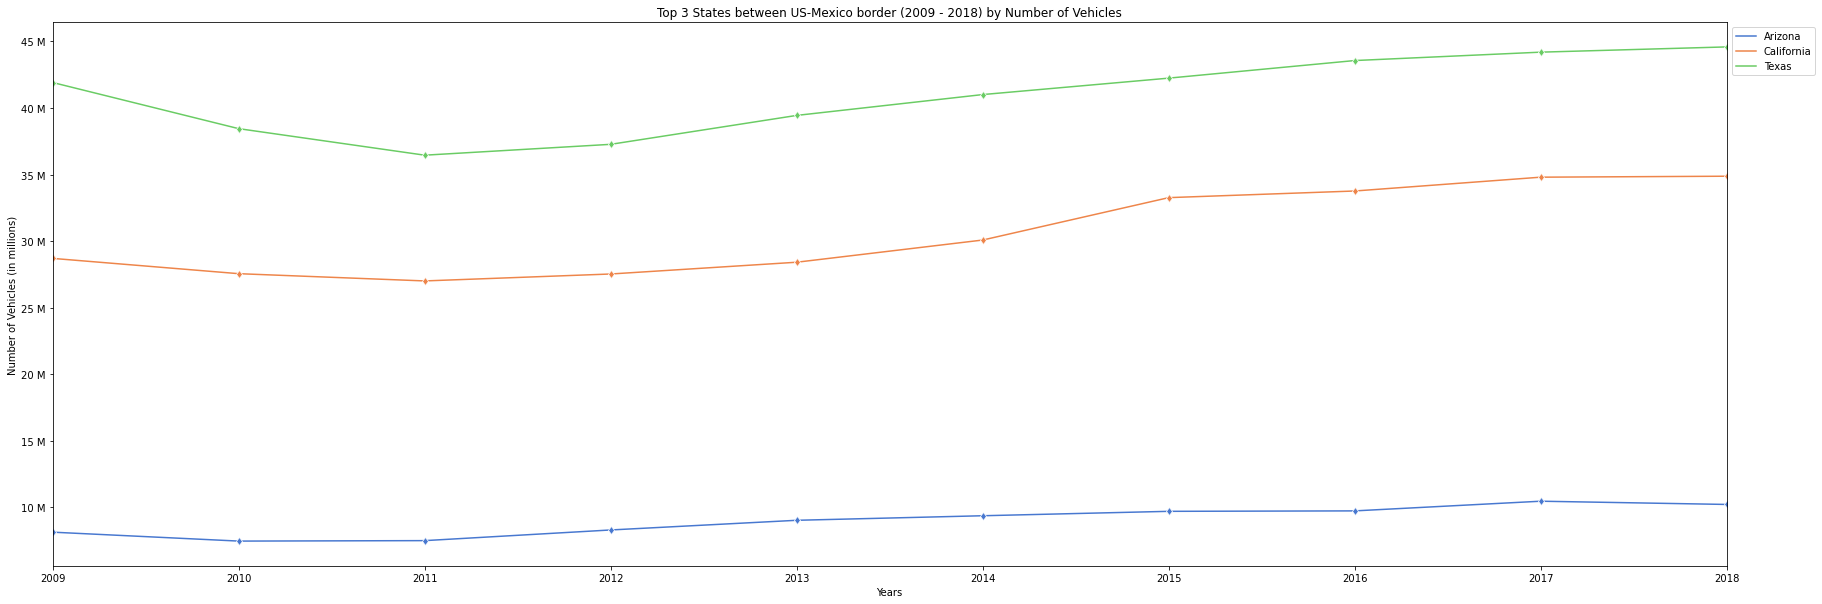

In [59]:
# Create a chart to see vehicle traffic on top 3 states between US and Mexico over 10 years

# Get the data to plot the chart
Fig18 = sns.lineplot(data=top3_states_mexico_vehicle_data, x="Year", y="Value", hue="State", marker='d')

# x_labels = top_ports_canada_people["Year"].sort_values().unique()
# print(x_labels)

# Format y-axis values to display in a reasonable format
Fig18.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig4.bar_label(Fig4.containers[0])

# Set chart title and axis labels
Fig18.set_xlabel("Years")
Fig18.set_ylabel("Number of Vehicles (in millions)")
Fig18.set_title("Top 3 States between US-Mexico border (2009 - 2018) by Number of Vehicles")

# Set parametes and xticks
Fig18.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5

# Fig4.set_xticks(range(10))
# Fig4.set_xticklabels(x_labels)

# Save the figure
plt.savefig("Images/Fig18.png")

# Show the chart
plt.show()

Which vehicle types are used the most between 2009 to 2018?

In [61]:
vehicle_types = vehicles_df.groupby(["Year","Border","Measure"])["Value"].sum().reset_index()
vehicle_types

,Year,Border,Measure,Value
0,2009,US-Canada Border,Buses,116355
1,2009,US-Canada Border,Personal Vehicles,26706830
2,2009,US-Canada Border,Rail Containers Empty,530484
3,2009,US-Canada Border,Rail Containers Full,1022932
4,2009,US-Canada Border,Trains,24034
...,...,...,...,...
155,2018,US-Mexico Border,Rail Containers Full,499030
156,2018,US-Mexico Border,Trains,11206
157,2018,US-Mexico Border,Truck Containers Empty,1785452
158,2018,US-Mexico Border,Truck Containers Full,4553320


In [69]:
vehicle_types_canada = vehicle_types.loc[vehicle_types["Border"] == "US-Canada Border"]
vehicle_types_canada = vehicle_types_canada.drop(columns = "Border").sort_values("Value", ascending = False).reset_index(drop = True)
vehicle_types_canada

,Year,Measure,Value
0,2013,Personal Vehicles,33273388
1,2012,Personal Vehicles,33083636
2,2014,Personal Vehicles,31979736
3,2011,Personal Vehicles,31595769
4,2010,Personal Vehicles,28884267
...,...,...,...
75,2011,Trains,26667
76,2010,Trains,26123
77,2009,Trains,24034
78,2018,Trains,23730


In [71]:
vehicle_types_canada["Measure"].value_counts()

Personal Vehicles         10
Trucks                    10
Truck Containers Full     10
Rail Containers Full      10
Truck Containers Empty    10
Rail Containers Empty     10
Buses                     10
Trains                    10
Name: Measure, dtype: int64

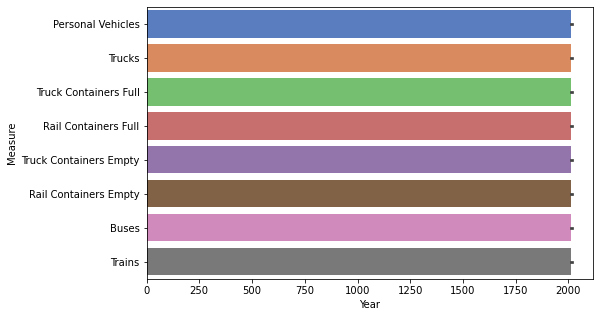

In [75]:
#data = sns.load_dataset(vehicle_types_canada)
fig19, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = "Year", y ="Measure", data = vehicle_types_canada, label = "Personal Vehicles")
plt.show()